<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [1]:
from numpy import array
from numpy.linalg import eig
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn

sn.set(font_scale=1.5)

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [2]:
#Loaded the data 
satscores_pd = ''
satscores_file = 'sat_scores.csv'
with open(satscores_file, 'r') as f:
    satscores_pd = f.readlines()

In [3]:
#creating an empty list to put our lines of data in 
sat_scores = []

#removes \n from the end of every row and replaced with a space. Also seperating each line with a ,
for line in satscores_pd:
    sat_scores.append(line.replace('\n','').split(','))

In [4]:
#Creating an empty dictionary for us to but our headers and rows into
satscores_dict = {}

In [5]:
#seperation the rows and headers 
#points to the headers in the sat scores list. Position is 0
satscores_headers = sat_scores[0]
#points to the rows of the sat scores list. Position is everything from 1 onwards
satscores_values = sat_scores[1:]

In [6]:
for index,h in enumerate(satscores_headers):
    new_list = []
    
    for v in satscores_values:
        new_list.append(v[index])
    satscores_dict[h] = new_list

In [7]:
#created a new data frame from our dictionary 
dfsat_scores = pd.DataFrame(satscores_dict)
#Reviewing the data types of the dictionary
dfsat_scores.dtypes

State     object
Rate      object
Verbal    object
Math      object
dtype: object

In [8]:
#made a data frame with the pandas .read_csv() function
sat_scores = pd.read_csv('sat_scores.csv')

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [9]:
#data types of the panda data frame. As you can see these are different and we require intergers in order to analyze the data further. In the previous dataframe they are all objects which makes it impossible to analyze in the way required
sat_scores.dtypes

State     object
Rate       int64
Verbal     int64
Math       int64
dtype: object

In [10]:
dfsat_scores = pd.DataFrame(sat_scores)
dfsat_scores.head()

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516


If you did not convert the string column values to float in your dictionary, the columns in the DataFrame are of type `object` (which are string values, essentially). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [11]:
sat_scores.head(10)

,State,Rate,Verbal,Math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [12]:
#using markdown right down name, typem description, of each variable and the shape of the entire dataset 

In [13]:
sat_scores_dict = dfsat_scores.to_dict()
sat_scores_dict

{'State': {0: 'CT',
  1: 'NJ',
  2: 'MA',
  3: 'NY',
  4: 'NH',
  5: 'RI',
  6: 'PA',
  7: 'VT',
  8: 'ME',
  9: 'VA',
  10: 'DE',
  11: 'MD',
  12: 'NC',
  13: 'GA',
  14: 'IN',
  15: 'SC',
  16: 'DC',
  17: 'OR',
  18: 'FL',
  19: 'WA',
  20: 'TX',
  21: 'HI',
  22: 'AK',
  23: 'CA',
  24: 'AZ',
  25: 'NV',
  26: 'CO',
  27: 'OH',
  28: 'MT',
  29: 'WV',
  30: 'ID',
  31: 'TN',
  32: 'NM',
  33: 'IL',
  34: 'KY',
  35: 'WY',
  36: 'MI',
  37: 'MN',
  38: 'KS',
  39: 'AL',
  40: 'NE',
  41: 'OK',
  42: 'MO',
  43: 'LA',
  44: 'WI',
  45: 'AR',
  46: 'UT',
  47: 'IA',
  48: 'SD',
  49: 'ND',
  50: 'MS',
  51: 'All'},
 'Rate': {0: 82,
  1: 81,
  2: 79,
  3: 77,
  4: 72,
  5: 71,
  6: 71,
  7: 69,
  8: 69,
  9: 68,
  10: 67,
  11: 65,
  12: 65,
  13: 63,
  14: 60,
  15: 57,
  16: 56,
  17: 55,
  18: 54,
  19: 53,
  20: 53,
  21: 52,
  22: 51,
  23: 51,
  24: 34,
  25: 33,
  26: 31,
  27: 26,
  28: 23,
  29: 18,
  30: 17,
  31: 13,
  32: 13,
  33: 12,
  34: 12,
  35: 11,
  36: 11,
  37: 9

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

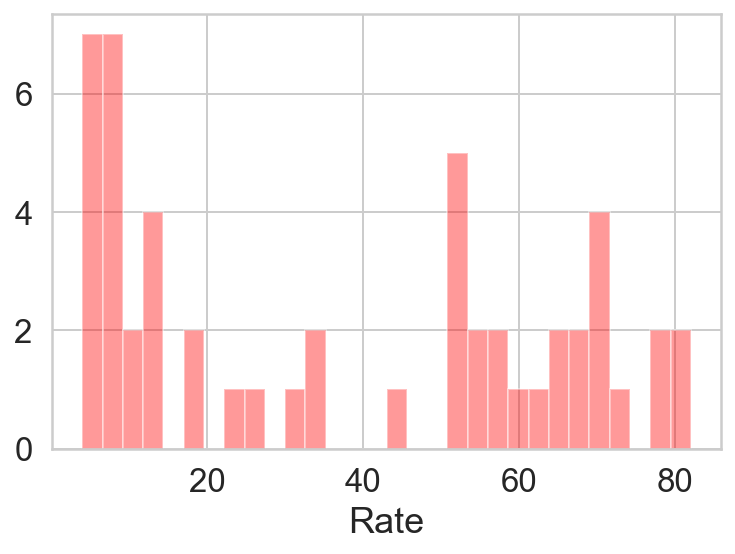

In [14]:
sn.set_style('whitegrid') 
sn.distplot(sat_scores['Rate'], kde = False, color ='red', bins = 30)

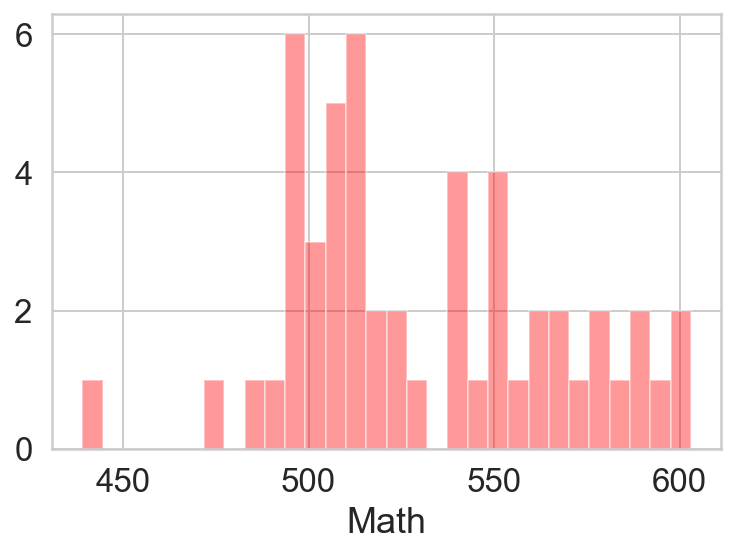

In [15]:
sn.set_style('whitegrid') 
sn.distplot(dfsat_scores['Math'], kde = False, color ='red', bins = 30)

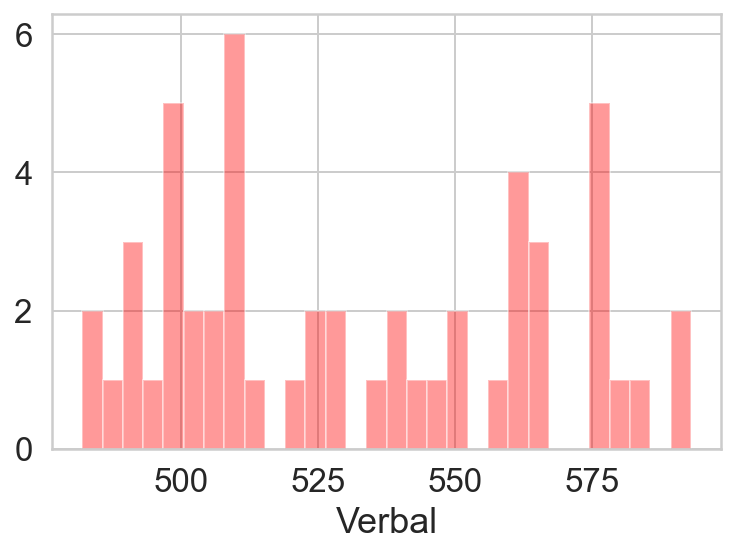

In [16]:
sn.set_style('whitegrid') 
sn.distplot(dfsat_scores['Verbal'], kde = False, color ='red', bins = 30)

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

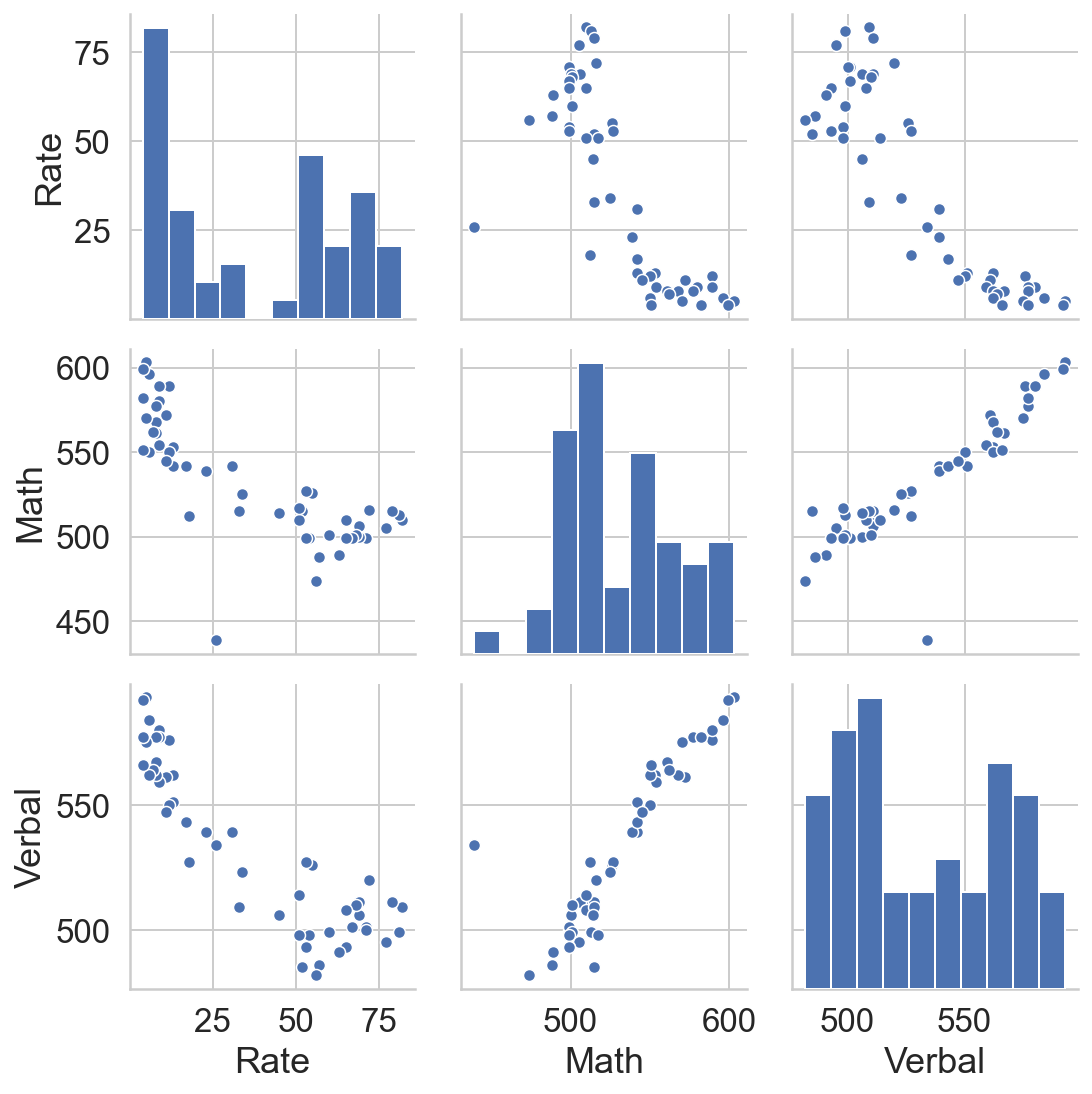

In [17]:
g = sn.pairplot(dfsat_scores, vars=["Rate", "Math", "Verbal"])

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

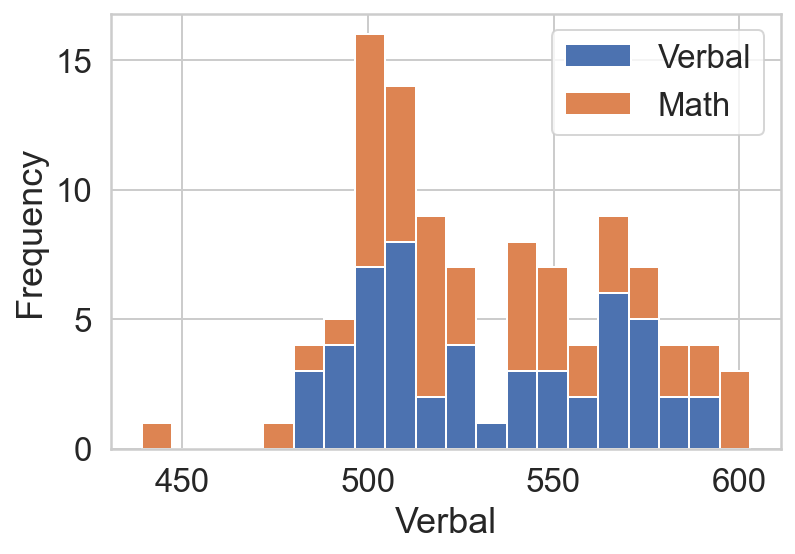

In [18]:
dfsat_scores.loc[:,['Verbal','Math']].plot.hist(bins=20, stacked=True)
plt.xlabel('Verbal')
plt.ylabel('Frequency')
plt.show()

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

Boxpolts as with histograms ans scatterplots can be used for moderate to large amount of data, however the size of the boxplot can vary significantly if the data size is too small. Boxplots can be less detailed and take up less space which allows easy comparison of multiple data sets.

{'whiskers': [<matplotlib.lines.Line2D at 0x7f9d0e716430>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9d0e716af0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9d0e7160d0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9d0e71f1f0>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9d0e71f4f0>,
 'means': []}

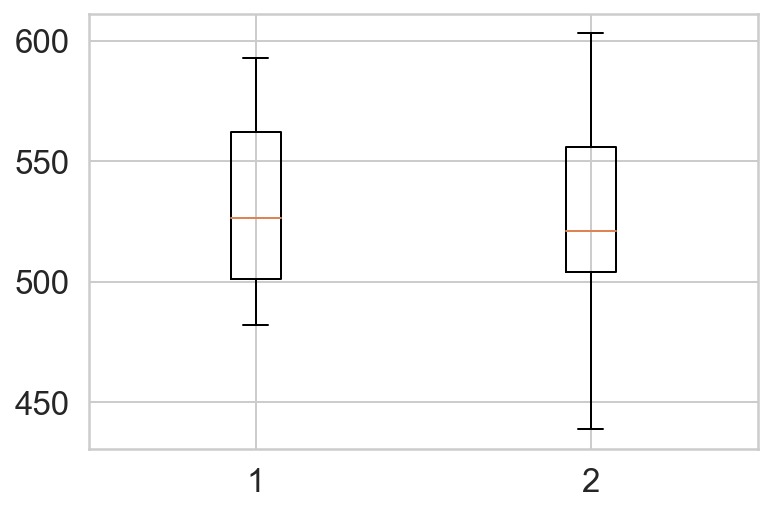

In [19]:
plt.boxplot([dfsat_scores['Verbal'],dfsat_scores['Math']])

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


{'whiskers': [<matplotlib.lines.Line2D at 0x7f9d0e95fc40>,
 'caps': [<matplotlib.lines.Line2D at 0x7f9d0eafe340>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f9d0e95f8e0>,
 'medians': [<matplotlib.lines.Line2D at 0x7f9d0eafea00>,
 'fliers': [<matplotlib.lines.Line2D at 0x7f9d0eafed00>,
 'means': []}

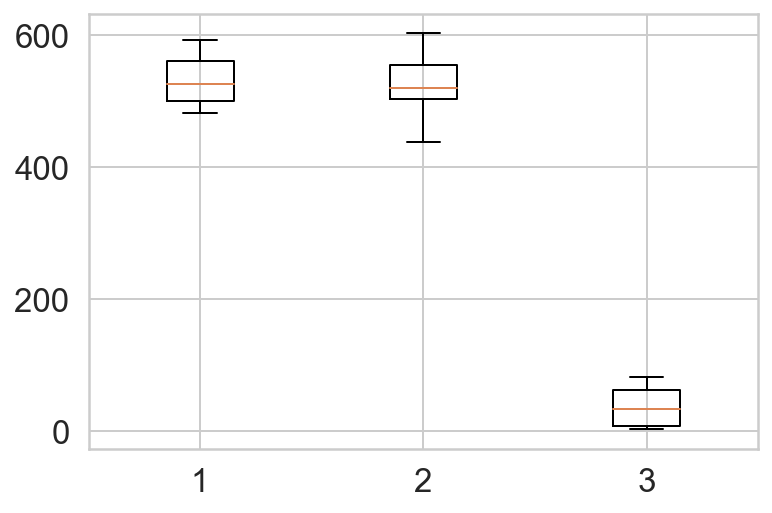

In [20]:
plt.boxplot([dfsat_scores['Verbal'],dfsat_scores['Math'],dfsat_scores['Rate']])


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [21]:
sat_scores[sat_scores.Verbal > sat_scores.Verbal.mean()]
#just under half the states are above the mean 

,State,Rate,Verbal,Math
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550
35,WY,11,547,545
36,MI,11,561,572


### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [22]:
sat_scores[sat_scores.Verbal > sat_scores.Verbal.median()]

,State,Rate,Verbal,Math
19,WA,53,527,527
26,CO,31,539,542
27,OH,26,534,439
28,MT,23,539,539
29,WV,18,527,512
30,ID,17,543,542
31,TN,13,562,553
32,NM,13,551,542
33,IL,12,576,589
34,KY,12,550,550


### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [23]:
V_sub_M = sat_scores["Verbal"] - sat_scores["Math"]

In [24]:
sat_scores['Verbal-Math'] = V_sub_M
sat_scores

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
1,NJ,81,499,513,-14
2,MA,79,511,515,-4
3,NY,77,495,505,-10
4,NH,72,520,516,4
5,RI,71,501,499,2
6,PA,71,500,499,1
7,VT,69,511,506,5
8,ME,69,506,500,6
9,VA,68,510,501,9


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [25]:
# New Dataframe 1
new_sat_scores_1 = sat_scores[sat_scores.Verbal > sat_scores.Math]
new_sat_scores_1.sort_values(by=['Verbal-Math'], ascending=True)
new_sat_scores_1.nlargest(10, 'Verbal-Math').head(3)

,State,Rate,Verbal,Math,Verbal-Math
27,OH,26,534,439,95
29,WV,18,527,512,15
50,MS,4,566,551,15


In [26]:
#New dataframe 2: 
new_sat_scores_1 = sat_scores[sat_scores.Verbal < sat_scores.Math]
new_sat_scores_1.sort_values(by=['Verbal-Math'], ascending=True)
new_sat_scores_1.nlargest(10, 'Verbal-Math').head(3)

,State,Rate,Verbal,Math,Verbal-Math
0,CT,82,509,510,-1
18,FL,54,498,499,-1
11,MD,65,508,510,-2


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [27]:
corrMatrix = sat_scores.corr()
print(corrMatrix)

                 Rate    Verbal      Math  Verbal-Math
Rate         1.000000 -0.886432 -0.773746    -0.101412
Verbal      -0.886432  1.000000  0.899871     0.052600
Math        -0.773746  0.899871  1.000000    -0.388219
Verbal-Math -0.101412  0.052600 -0.388219     1.000000


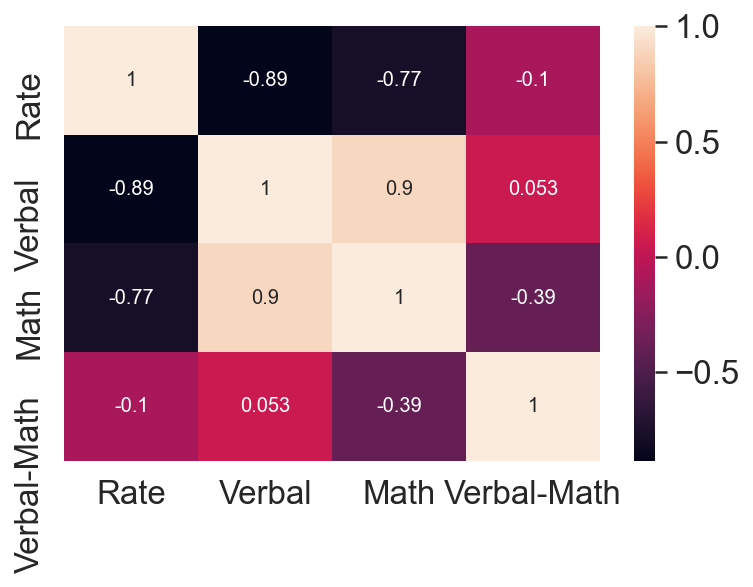

In [28]:
sn.heatmap(corrMatrix, annot=True)
plt.show()

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [29]:
sat_scores.describe()

,Rate,Verbal,Math,Verbal-Math
count,52.000000,52.000000,52.000000,52.000000
mean,37.153846,532.019231,531.500000,0.519231
std,27.301788,33.236225,36.014975,15.729939
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,504.000000,-6.000000
50%,33.500000,526.500000,521.000000,0.000000
75%,63.500000,562.000000,555.750000,4.250000
max,82.000000,593.000000,603.000000,95.000000


<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [30]:
#1. Describe how the covariance matrix is different from the correlation matrix.
sat_scores.var()

Rate            745.387632
Verbal         1104.646682
Math           1297.078431
Verbal-Math     247.430995
dtype: float64

The covariance matrix and the correlation matrix both measure the relationship and the dependency between two variables. “Covariance” indicates the direction of the linear relationship between variables. “Correlation” measures both the strength and direction of the linear relationship between two variables.

In [31]:
#2. What is the process to convert the covariance into the correlation?

In [32]:
sat_scores.corr()

,Rate,Verbal,Math,Verbal-Math
Rate,1.000000,-0.886432,-0.773746,-0.101412
Verbal,-0.886432,1.000000,0.899871,0.052600
Math,-0.773746,0.899871,1.000000,-0.388219
Verbal-Math,-0.101412,0.052600,-0.388219,1.000000


In [33]:
#3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [34]:
druguse_pd = ''
druguse_file = 'drug-use-by-age.csv'
with open(druguse_file, 'r') as f:
    druguse_pd = f.readlines()

In [35]:
druguse = []

for line in druguse_pd:
    druguse.append(line.replace('\n','').split(','))

In [36]:
druguse_dict = {}

In [37]:
druguse_headers = druguse[0]
druguse_values = druguse[1:]

In [38]:
for index,h in enumerate(druguse_headers):
    new_list = []
    
    for v in druguse_values:
        new_list.append(v[index])
    druguse_dict[h] = new_list

In [39]:
df_druguse = pd.read_csv('drug-use-by-age.csv')
df_druguse

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


In [40]:
df_druguse = pd.DataFrame(druguse_dict)
df_druguse

,age,n,alcohol-use,alcohol-frequency,marijuana-use,marijuana-frequency,cocaine-use,cocaine-frequency,crack-use,crack-frequency,...,oxycontin-use,oxycontin-frequency,tranquilizer-use,tranquilizer-frequency,stimulant-use,stimulant-frequency,meth-use,meth-frequency,sedative-use,sedative-frequency
0,12,2798,3.9,3.0,1.1,4.0,0.1,5.0,0.0,-,...,0.1,24.5,0.2,52.0,0.2,2.0,0.0,-,0.2,13.0
1,13,2757,8.5,6.0,3.4,15.0,0.1,1.0,0.0,3.0,...,0.1,41.0,0.3,25.5,0.3,4.0,0.1,5.0,0.1,19.0
2,14,2792,18.1,5.0,8.7,24.0,0.1,5.5,0.0,-,...,0.4,4.5,0.9,5.0,0.8,12.0,0.1,24.0,0.2,16.5
3,15,2956,29.2,6.0,14.5,25.0,0.5,4.0,0.1,9.5,...,0.8,3.0,2.0,4.5,1.5,6.0,0.3,10.5,0.4,30.0
4,16,3058,40.1,10.0,22.5,30.0,1.0,7.0,0.0,1.0,...,1.1,4.0,2.4,11.0,1.8,9.5,0.3,36.0,0.2,3.0
5,17,3038,49.3,13.0,28.0,36.0,2.0,5.0,0.1,21.0,...,1.4,6.0,3.5,7.0,2.8,9.0,0.6,48.0,0.5,6.5
6,18,2469,58.7,24.0,33.7,52.0,3.2,5.0,0.4,10.0,...,1.7,7.0,4.9,12.0,3.0,8.0,0.5,12.0,0.4,10.0
7,19,2223,64.6,36.0,33.4,60.0,4.1,5.5,0.5,2.0,...,1.5,7.5,4.2,4.5,3.3,6.0,0.4,105.0,0.3,6.0
8,20,2271,69.7,48.0,34.0,60.0,4.9,8.0,0.6,5.0,...,1.7,12.0,5.4,10.0,4.0,12.0,0.9,12.0,0.5,4.0
9,21,2354,83.2,52.0,33.0,52.0,4.8,5.0,0.5,17.0,...,1.3,13.5,3.9,7.0,4.1,10.0,0.6,2.0,0.3,9.0


### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

In [41]:
df_druguse.dtypes

age                        object
n                          object
alcohol-use                object
alcohol-frequency          object
marijuana-use              object
marijuana-frequency        object
cocaine-use                object
cocaine-frequency          object
crack-use                  object
crack-frequency            object
heroin-use                 object
heroin-frequency           object
hallucinogen-use           object
hallucinogen-frequency     object
inhalant-use               object
inhalant-frequency         object
pain-releiver-use          object
pain-releiver-frequency    object
oxycontin-use              object
oxycontin-frequency        object
tranquilizer-use           object
tranquilizer-frequency     object
stimulant-use              object
stimulant-frequency        object
meth-use                   object
meth-frequency             object
sedative-use               object
sedative-frequency         object
dtype: object

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [42]:
#Write a specific question you would like to answer with the data (that can be accomplished with EDA).

In [43]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [44]:
#Pull out the rate variable from the sat dataset.
sat_scores['Rate']

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

In [45]:
#Are there outliers in the dataset? Define, in words, how you numerically define outliers.

Outliers can defined as data points An outlier is defined as a data point that are a vastly different in terms on the majority of the data. They could be significantly larger or significantly smaller than do the rest of the data.

In [46]:
#Print out the outliers in the dataset.
sat_scores.loc[37:51,'Rate']

37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
51    45
Name: Rate, dtype: int64

In [47]:
#Remove the outliers from the dataset.
sat_scores.drop([38,39,40,41,42,43,44,45,46,47,48,49,50], axis = 0, inplace = True)

In [48]:
sat_scores['Rate']

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
51    45
Name: Rate, dtype: int64

In [49]:
#Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. 
#What is different about them and why?

Values have increased as they are no longer skewed by the outliers 

In [50]:
sat_scores.mean()

Rate            47.410256
Verbal         518.205128
Math           517.564103
Verbal-Math      0.641026
dtype: float64

In [51]:
sat_scores.median()

Rate            53.0
Verbal         510.0
Math           513.0
Verbal-Math      0.0
dtype: float64

In [52]:
sat_scores.std()

Rate           23.820290
Verbal         25.666053
Math           28.988015
Verbal-Math    17.618004
dtype: float64

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [53]:
#made a data frame with the pandas .read_csv() function
sat_scores = pd.read_csv('sat_scores.csv')

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.